# Import File

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [238]:
df = pd.read_csv('spam.csv', encoding='latin-1')

# Data Exploration

In [239]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [240]:
df.shape

(5572, 5)

In [241]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
332,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
1300,ham,Those cocksuckers. If it makes you feel better...,NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
3523,ham,Yeah that'd pretty much be the best case scenario,NaN,NaN,NaN
5227,ham,I re-met alex nichols from middle school and i...,NaN,NaN,NaN
4956,ham,I'm vivek:)i got call from your number.,NaN,NaN,NaN


In [242]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [243]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [244]:
duplicates = df[df.duplicated()]
duplicates.shape[0]


403

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# DATA CLEANING

In [246]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [247]:
df.shape

(5572, 2)

In [248]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(4)

,target,text
1075,ham,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."
2457,ham,K.k..how is your sister kids?
5040,ham,She ran off with a younger man. we will make p...


In [249]:
df.isnull().sum()

,0
target,0
text,0


In [250]:
df.duplicated().sum()

403

In [251]:
df = df.drop_duplicates(keep='first')

In [252]:
df.duplicated().sum()

0

In [253]:
df.shape

(5169, 2)

# DATA TRANSFORMATION


In [254]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [255]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [256]:
df['target']=en.fit_transform(df['target'])

In [257]:
df.sample(4)

,target,text
3591,0,I anything lor...
1427,0,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
1126,0,Not tonight mate. Catching up on some sleep. T...
3573,0,Yeah sure I'll leave in a min


# EDA


In [258]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [259]:
df['target'].value_counts()

,count
target,
0,4516
1,653


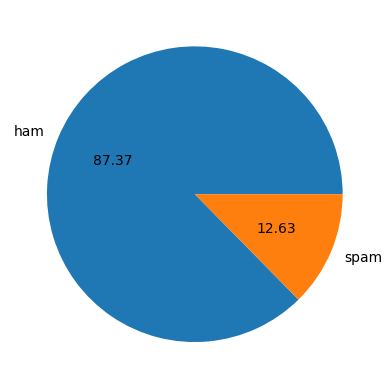

In [260]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [261]:
# we see that our data is imbalanced

In [262]:
import nltk

In [263]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [264]:
# total characters on sentences
df['num_char']=df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [265]:
# total words in sentence
import nltk
nltk.download('punkt_tab')
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [266]:
# total sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [267]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [268]:
#ham
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()


,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [269]:
#spam
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()


,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: title={'center': 'num_words'}, xlabel='num_words', ylabel='Count'>

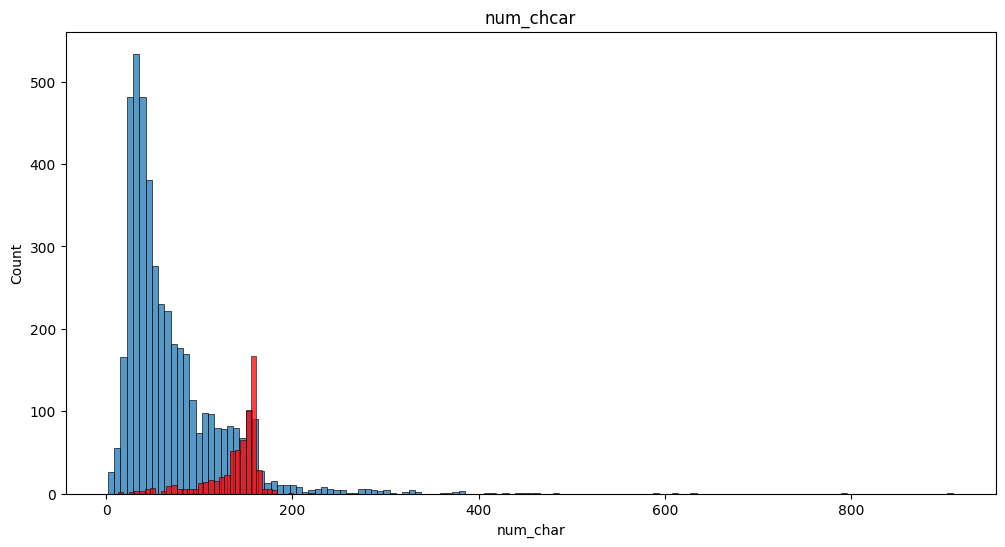

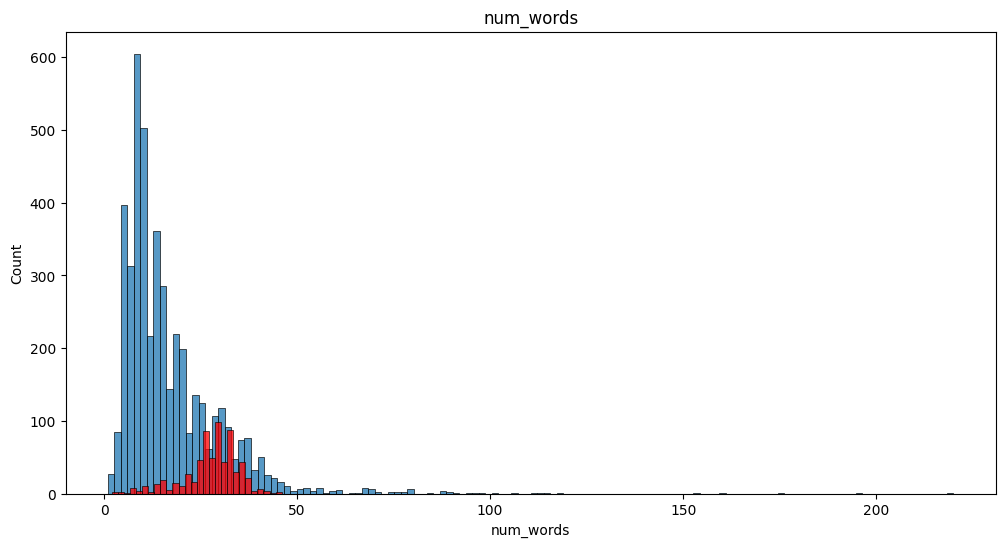

In [270]:
import seaborn
plt.figure(figsize=(12,6))
plt.title('num_chcar')
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

plt.figure(figsize=(12,6))
plt.title('num_words')
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

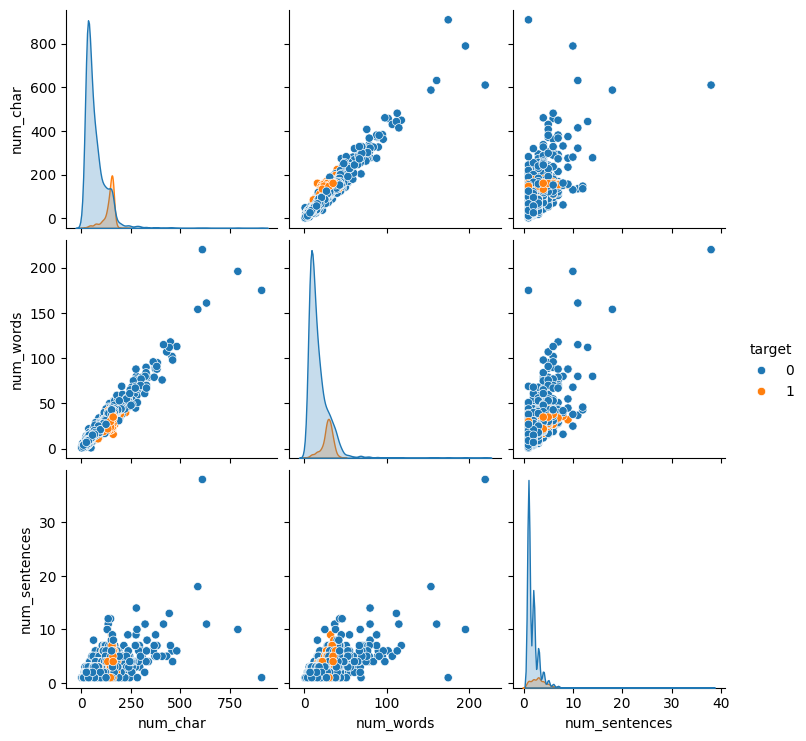

In [271]:
sns.pairplot(df,hue='target')

<Axes: >

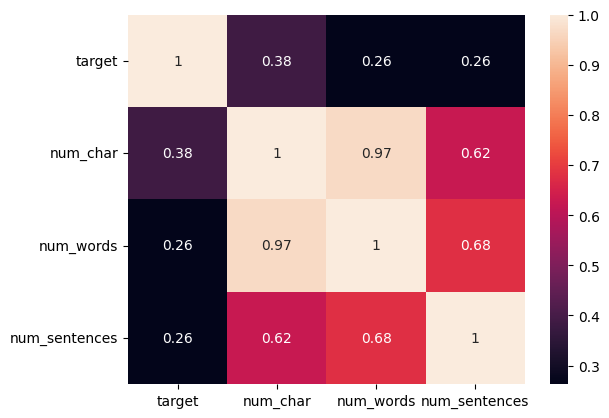

In [272]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

# TEXT PREPROCESSING

In [273]:
from sys import ps1
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [274]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))



  return " ".join(y)





In [275]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [276]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [277]:
df['transformed_text'] = df['text'].apply(transform_text)

In [278]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [279]:
from wordcloud import wordcloud
wc = wordcloud.WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [280]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


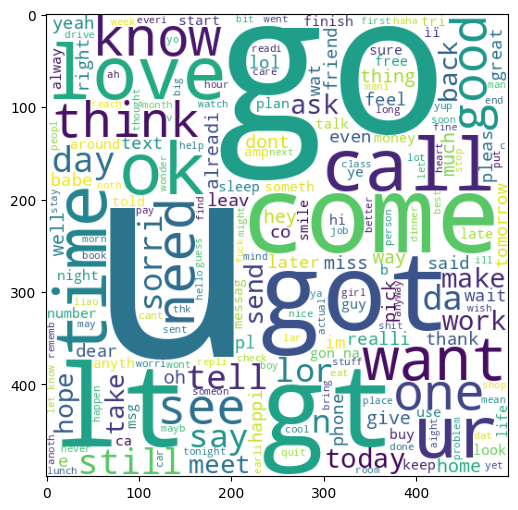

In [281]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
#plt.imshow(ham_wc)

In [282]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
  for words in i.split():
    spam_corpus.append(words)

In [283]:
# len(spam_corpus)

In [284]:
# from collections import Counter
# Counter(spam_corpus).most_common(30)

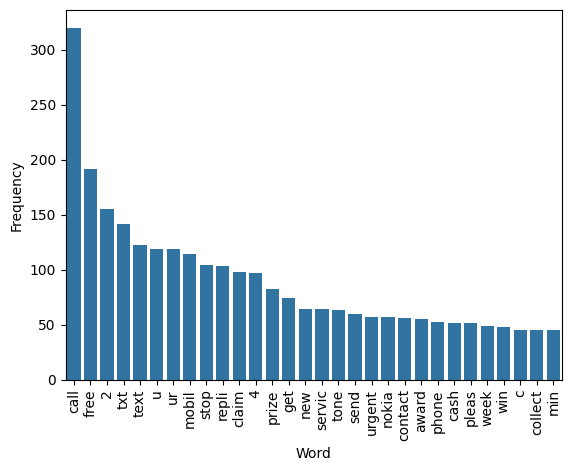

In [285]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
most_common_words = Counter(spam_corpus).most_common(30)
word_counts_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

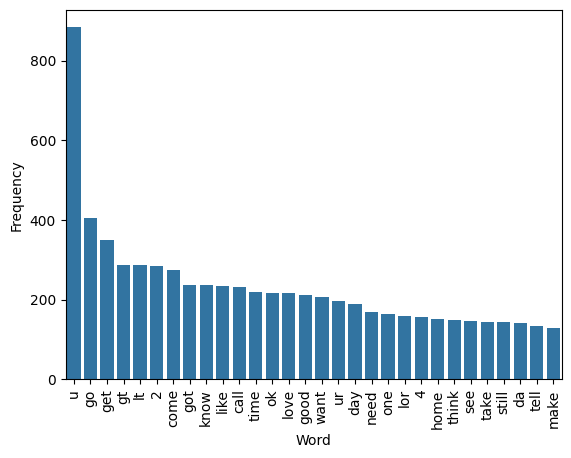

In [286]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
most_common_words = Counter(ham_corpus).most_common(30)
word_counts_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [287]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
#tf = TfidfVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [288]:
#x = cv.fit_transform(df['transformed_text']).toarray()
x = tf.fit_transform(df['transformed_text']).toarray()

In [289]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# x = sc.fit_transform(x)

In [290]:
x.shape
# [sms, words]

(5169, 3000)

In [291]:
y = df['target'].values

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [294]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [295]:
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [296]:
# gnb.fit(x_train, y_train)
# y_pred1 = gnb.predict(x_test)
# print(accuracy_score(y_test, y_pred1))
# print(confusion_matrix(y_test, y_pred1))
# print(precision_score(y_test, y_pred1))

In [297]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [298]:
# bnb.fit(x_train, y_train)
# y_pred3 = bnb.predict(x_test)
# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test, y_pred3))
# print(precision_score(y_test, y_pred3))

In [299]:
# tfidf(mnb)

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [301]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [302]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [303]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [304]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [305]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [306]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [307]:
# df after max_iterations=3000
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
#temp_df

In [308]:
# df after caling
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
#temp_df

In [309]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837


In [310]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')
# new_df_scaled

In [311]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# #performance_df1
# sns.catplot(x = 'Algorithm', y='value',
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [312]:
# #voting classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [313]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [314]:
#voting.fit(x_train,y_train)

In [315]:
# y_pred = voting.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [316]:
# # stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [317]:
# clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [319]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))